<a href="https://colab.research.google.com/github/vankiee/ML_for_data_analysis/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd 
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot

# Clean data

In [ ]:
df = pd.read_csv('/content/gapminder.csv')
df[df.columns[1:]] = df.iloc[:, 1:].apply(pd.to_numeric, errors = 'coerce') 
dataset = df[df['lifeexpectancy'].notna()].reset_index(drop = True)
dataset

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.500073,73.131,0.420095,2.0,590.509814,4.848770,50.500000,65.22
3,Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,69.400002,2.0,9.999954,51.093,NaN,-2.0,172.999227,14.554677,75.699997,56.70
4,Argentina,10749.419238,9.35,0.560987,73.9,5.872119e+09,45.900002,0.5,36.000335,75.901,0.635944,8.0,768.428300,7.765584,58.400002,92.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
187,West Bank and Gaza,NaN,NaN,5.936085,NaN,1.424133e+07,11.300000,NaN,36.422772,72.832,NaN,NaN,NaN,NaN,32.000000,71.90
188,"Yemen, Rep.",610.357367,0.20,2.316235,35.1,2.348647e+08,20.299999,NaN,12.349750,65.493,NaN,-2.0,130.057831,6.265789,39.000000,30.64
189,Zambia,432.226337,3.56,0.341335,13.0,1.320257e+08,53.500000,13.5,10.124986,49.025,NaN,7.0,168.623031,12.019036,61.000000,35.42


In [ ]:
dataset['lifeexpectancy'] = [1 if x >= 76.6 else 0 for x in dataset['lifeexpectancy']]

# Fitting Model

In [ ]:
predictors = dataset[dataset.columns.drop(['country', 'lifeexpectancy'])]
target = dataset['lifeexpectancy']

### Strategies to fill NaN

mean Mean: 0.8968421052631579 SD: 0.08219462074047401
median Mean: 0.9057894736842104 SD: 0.05645089548543967
most_frequent Mean: 0.8917543859649122 SD: 0.06498715454198022
constant Mean: 0.8918421052631577 SD: 0.05896283475045774


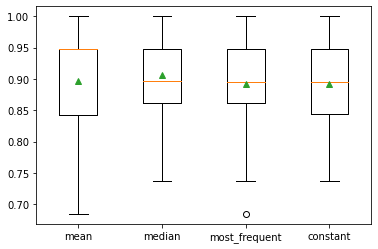

In [ ]:
randomForest = RandomForestClassifier(n_estimators=25)
strategies = ['mean', 'median', 'most_frequent', 'constant']
results = []

for strategy in strategies:
  imputer = SimpleImputer(strategy=strategy)
  pipeline = Pipeline(steps=[('imputer', imputer), ('randomForest', randomForest)])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, predictors, target, cv=cv, scoring='accuracy', n_jobs=-1)
  results.append(scores)
  print(strategy, 'Mean:', np.mean(scores), 'SD:', np.std(scores))

pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

### Fitting random forest

In [ ]:
randomForest = RandomForestClassifier(n_estimators=25)
imputer = SimpleImputer(strategy='median')
pipeline = Pipeline(steps=[('imputer', imputer), ('randomForest', randomForest)])
predictions = cross_val_predict(pipeline, predictors, target, cv=10)
print('accuracy:', metrics.accuracy_score(target, predictions))
metrics.confusion_matrix(target, predictions)

accuracy: 0.9109947643979057


array([[138,   5],
       [ 12,  36]])

### Finding feature importance rank

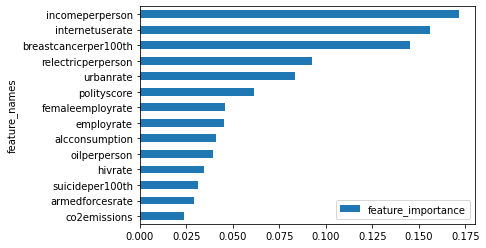

In [ ]:
extraTree = ExtraTreesClassifier()
imputer = SimpleImputer(strategy='median')
pipeline = Pipeline(steps=[('imputer', imputer), ('extraTree', extraTree)])

pipeline.fit(predictors, target)
features = list(zip(predictors, pipeline.named_steps['extraTree'].feature_importances_))

featuresDf = pd.DataFrame(features).rename(columns={0: 'feature_names', 
                                                    1: 'feature_importance'}).set_index('feature_names')

_ = featuresDf.sort_values(by='feature_importance').plot.barh(orientation='horizontal')

# See effect of different number of trees on prediction accuracy

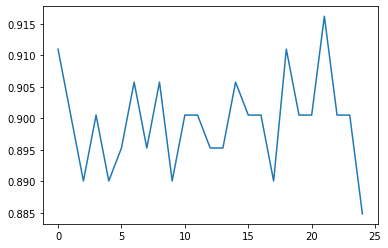

In [ ]:
trees = range(25)
accuracy = np.zeros(25)

for idx in range(len(trees)):
  classifier = RandomForestClassifier(n_estimators=idx+1)
  pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='median')),
                              ('m', RandomForestClassifier())])
  predictions = cross_val_predict(pipeline, predictors, target, cv=10)
  accuracy[idx] = metrics.accuracy_score(target, predictions)

plt.plot(trees, accuracy)

# Conclusion

The explanatory variables with the highest relative importance scores were income per person, internet use rate, breast cancer per 100,000 female, relectricperperson and urban rate. The accuracy of the random forest was 91%. 4-5 trees suffice to reach high prediction accuracy.